# ДЗ1
Реализовать mel-спектрограмму с использованием numpy и библиотеки чтения аудиофайла(например, soundfile)
Визуализировать можно с помощью matplotlib

In [2]:
%%capture

!pip uninstall -y torchaudio torch librosa
!pip install torch torchaudio librosa
!pip install audiomentations

In [3]:
import torchaudio

In [4]:
import librosa
import librosa.display
import IPython.display as ip
from IPython.display import Audio
path_to_save = '/content'
import numpy as np
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Audio data shape: (117601,)
Sample rate: 22050


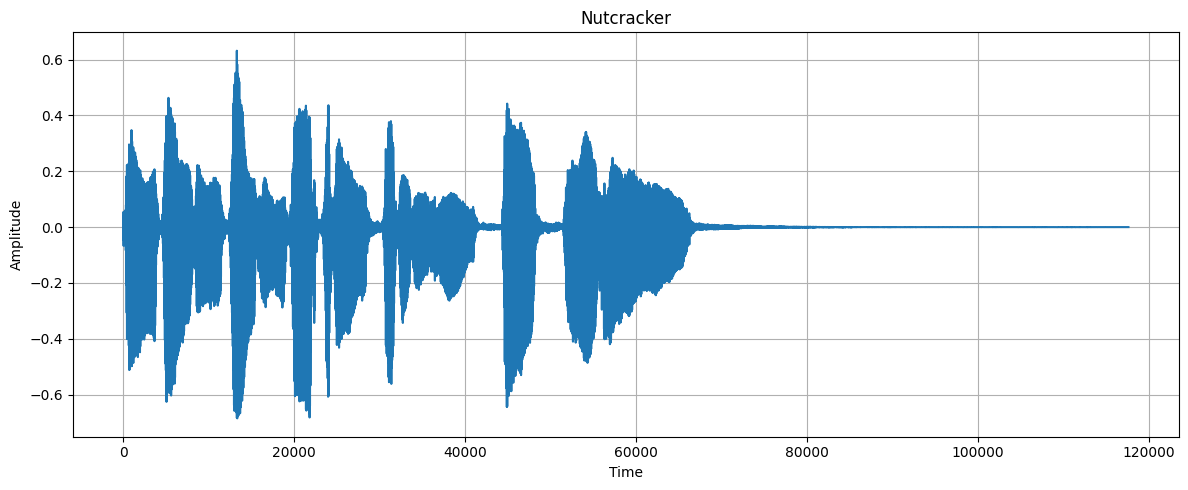

In [52]:
audio_path = librosa.ex('trumpet')
wav, sr = librosa.load(audio_path)

print(f"Audio data shape: {wav.shape}")
print(f"Sample rate: {sr}")
display(Audio(data=wav, rate=sr))

# Plot with time axis
plt.figure(figsize=(12, 5))
plt.plot(wav)
plt.title('Nutcracker')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
wav, sr

(array([-1.4068222e-03, -4.4607258e-04, -4.1098078e-04, ...,
         7.9623051e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32),
 22050)

In [54]:
mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr)

In [55]:
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

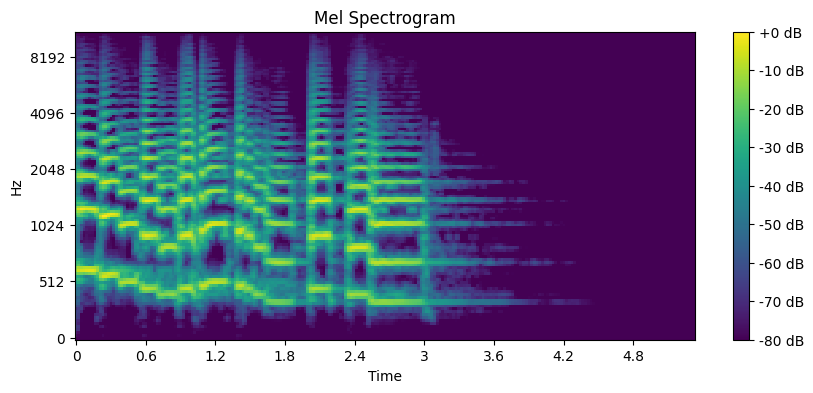

In [56]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [57]:
import soundfile as sf

output_path = 'trumpet_audio.wav'

# Save the audio data to a WAV file using soundfile
sf.write(output_path, wav, sr, format='WAV')